<a href="https://colab.research.google.com/github/shnhdan/data-engineering-projects/blob/main/MySQL_Reports_Project/MySQL_Database_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MySQL Database + Reports Project

**Goal:** Build a sales database, write SQL queries to analyze data, and generate automated reports using Python.

**Scenario:** We're managing a small online store's sales data

**Tools:** MySQL, Python, mysql-connector, Pandas

**Author:** Your Name
**Date:** January 2026

---

## What This Project Does:
1. Creates a MySQL database
2. Designs tables for products, customers, and orders
3. Inserts sample sales data
4. Runs SQL queries to generate insights
5. Creates automated reports with Python

In [16]:
# Install required libraries
!pip install -q mysql-connector-python pandas matplotlib

# We'll use SQLite (built into Python) which works just like MySQL
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

print("✅ All libraries installed successfully!")
print("📊 Using SQLite (works exactly like MySQL for learning)")

✅ All libraries installed successfully!
📊 Using SQLite (works exactly like MySQL for learning)


In [17]:
# Create database connection
# In real projects, this would be MySQL. SQLite works the same way!
conn = sqlite3.connect('online_store.db')
cursor = conn.cursor()

print("=" * 50)
print("DATABASE CONNECTION")
print("=" * 50)
print("✅ Connected to database: 'online_store.db'")
print("✅ Cursor created for executing SQL queries")

DATABASE CONNECTION
✅ Connected to database: 'online_store.db'
✅ Cursor created for executing SQL queries


In [18]:
print("=" * 50)
print("CREATING DATABASE TABLES")
print("=" * 50)

# Table 1: Products
cursor.execute('''
CREATE TABLE IF NOT EXISTS products (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT NOT NULL,
    category TEXT NOT NULL,
    price DECIMAL(10, 2) NOT NULL,
    stock_quantity INTEGER NOT NULL
)
''')
print("Created table: products")

# Table 2: Customers
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY,
    customer_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    city TEXT NOT NULL,
    join_date DATE NOT NULL
)
''')
print("Created table: customers")

# Table 3: Orders
cursor.execute('''
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER NOT NULL,
    product_id INTEGER NOT NULL,
    quantity INTEGER NOT NULL,
    order_date DATE NOT NULL,
    total_amount DECIMAL(10, 2) NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
)
''')
print("Created table: orders")

# Commit changes
conn.commit()
print("\n All tables created successfully!")

CREATING DATABASE TABLES
Created table: products
Created table: customers
Created table: orders

 All tables created successfully!


In [19]:
print("=" * 50)
print("INSERTING SAMPLE DATA")
print("=" * 50)

# Insert Products
products_data = [
    (1, 'Laptop', 'Electronics', 899.99, 50),
    (2, 'Smartphone', 'Electronics', 599.99, 100),
    (3, 'Headphones', 'Electronics', 79.99, 200),
    (4, 'Desk Chair', 'Furniture', 199.99, 30),
    (5, 'Standing Desk', 'Furniture', 399.99, 20),
    (6, 'Monitor', 'Electronics', 299.99, 75),
    (7, 'Keyboard', 'Electronics', 49.99, 150),
    (8, 'Mouse', 'Electronics', 29.99, 180),
    (9, 'Bookshelf', 'Furniture', 149.99, 25),
    (10, 'Office Lamp', 'Furniture', 39.99, 60)
]

cursor.executemany('''
    INSERT OR IGNORE INTO products
    (product_id, product_name, category, price, stock_quantity)
    VALUES (?, ?, ?, ?, ?)
''', products_data)
print(f"✅ Inserted {len(products_data)} products")

# Insert Customers
customers_data = [
    (1, 'Alice Johnson', 'alice@email.com', 'New York', '2023-01-15'),
    (2, 'Bob Smith', 'bob@email.com', 'Los Angeles', '2023-02-20'),
    (3, 'Charlie Brown', 'charlie@email.com', 'Chicago', '2023-03-10'),
    (4, 'Diana Prince', 'diana@email.com', 'Houston', '2023-04-05'),
    (5, 'Eve Davis', 'eve@email.com', 'Phoenix', '2023-05-12'),
    (6, 'Frank Miller', 'frank@email.com', 'Philadelphia', '2023-06-18'),
    (7, 'Grace Lee', 'grace@email.com', 'San Antonio', '2023-07-22'),
    (8, 'Henry Wilson', 'henry@email.com', 'San Diego', '2023-08-30'),
    (9, 'Iris Martinez', 'iris@email.com', 'Dallas', '2023-09-14'),
    (10, 'Jack Taylor', 'jack@email.com', 'San Jose', '2023-10-25')
]

cursor.executemany('''
    INSERT OR IGNORE INTO customers
    (customer_id, customer_name, email, city, join_date)
    VALUES (?, ?, ?, ?, ?)
''', customers_data)
print(f"✅ Inserted {len(customers_data)} customers")

# Insert Orders (generate realistic order data)
orders_data = [
    (1, 1, 1, 1, '2024-01-10', 899.99),
    (2, 1, 3, 2, '2024-01-10', 159.98),
    (3, 2, 2, 1, '2024-01-12', 599.99),
    (4, 3, 4, 1, '2024-01-15', 199.99),
    (5, 4, 5, 1, '2024-01-18', 399.99),
    (6, 2, 6, 2, '2024-01-20', 599.98),
    (7, 5, 7, 3, '2024-01-22', 149.97),
    (8, 6, 8, 5, '2024-01-25', 149.95),
    (9, 7, 9, 1, '2024-01-28', 149.99),
    (10, 3, 3, 1, '2024-02-01', 79.99),
    (11, 8, 1, 1, '2024-02-05', 899.99),
    (12, 9, 2, 2, '2024-02-08', 1199.98),
    (13, 10, 10, 3, '2024-02-10', 119.97),
    (14, 1, 7, 1, '2024-02-12', 49.99),
    (15, 4, 6, 1, '2024-02-15', 299.99),
    (16, 5, 4, 2, '2024-02-18', 399.98),
    (17, 7, 5, 1, '2024-02-20', 399.99),
    (18, 8, 8, 4, '2024-02-22', 119.96),
    (19, 2, 3, 3, '2024-02-25', 239.97),
    (20, 6, 1, 1, '2024-02-28', 899.99)
]

cursor.executemany('''
    INSERT OR IGNORE INTO orders
    (order_id, customer_id, product_id, quantity, order_date, total_amount)
    VALUES (?, ?, ?, ?, ?, ?)
''', orders_data)
print(f"✅ Inserted {len(orders_data)} orders")

conn.commit()
print("\n🎉 All sample data inserted successfully!")

INSERTING SAMPLE DATA
✅ Inserted 10 products
✅ Inserted 10 customers
✅ Inserted 20 orders

🎉 All sample data inserted successfully!


In [20]:
print("=" * 50)
print("SQL QUERY 1: View All Products")
print("=" * 50)

query1 = "SELECT * FROM products LIMIT 5"
df_products = pd.read_sql_query(query1, conn)
print(df_products)

print("\n" + "=" * 50)
print("SQL QUERY 2: View All Customers")
print("=" * 50)

query2 = "SELECT customer_name, email, city FROM customers LIMIT 5"
df_customers = pd.read_sql_query(query2, conn)
print(df_customers)

print("\n" + "=" * 50)
print("SQL QUERY 3: Recent Orders")
print("=" * 50)

query3 = "SELECT * FROM orders ORDER BY order_date DESC LIMIT 5"
df_orders = pd.read_sql_query(query3, conn)
print(df_orders)

SQL QUERY 1: View All Products
   product_id   product_name     category   price  stock_quantity
0           1         Laptop  Electronics  899.99              50
1           2     Smartphone  Electronics  599.99             100
2           3     Headphones  Electronics   79.99             200
3           4     Desk Chair    Furniture  199.99              30
4           5  Standing Desk    Furniture  399.99              20

SQL QUERY 2: View All Customers
   customer_name              email         city
0  Alice Johnson    alice@email.com     New York
1      Bob Smith      bob@email.com  Los Angeles
2  Charlie Brown  charlie@email.com      Chicago
3   Diana Prince    diana@email.com      Houston
4      Eve Davis      eve@email.com      Phoenix

SQL QUERY 3: Recent Orders
   order_id  customer_id  product_id  quantity  order_date  total_amount
0        20            6           1         1  2024-02-28        899.99
1        19            2           3         3  2024-02-25        239.97

In [21]:
print("=" * 50)
print("ADVANCED QUERY 1: Orders with Customer Names")
print("=" * 50)

query_join1 = '''
SELECT
    o.order_id,
    c.customer_name,
    c.city,
    o.order_date,
    o.total_amount
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
ORDER BY o.order_date DESC
LIMIT 10
'''

df_orders_with_customers = pd.read_sql_query(query_join1, conn)
print(df_orders_with_customers)

print("\n" + "=" * 50)
print("ADVANCED QUERY 2: Complete Order Details")
print("=" * 50)

query_join2 = '''
SELECT
    o.order_id,
    c.customer_name,
    p.product_name,
    p.category,
    o.quantity,
    o.total_amount,
    o.order_date
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN products p ON o.product_id = p.product_id
ORDER BY o.order_date DESC
LIMIT 10
'''

df_complete_orders = pd.read_sql_query(query_join2, conn)
print(df_complete_orders)

ADVANCED QUERY 1: Orders with Customer Names
   order_id  customer_name          city  order_date  total_amount
0        20   Frank Miller  Philadelphia  2024-02-28        899.99
1        19      Bob Smith   Los Angeles  2024-02-25        239.97
2        18   Henry Wilson     San Diego  2024-02-22        119.96
3        17      Grace Lee   San Antonio  2024-02-20        399.99
4        16      Eve Davis       Phoenix  2024-02-18        399.98
5        15   Diana Prince       Houston  2024-02-15        299.99
6        14  Alice Johnson      New York  2024-02-12         49.99
7        13    Jack Taylor      San Jose  2024-02-10        119.97
8        12  Iris Martinez        Dallas  2024-02-08       1199.98
9        11   Henry Wilson     San Diego  2024-02-05        899.99

ADVANCED QUERY 2: Complete Order Details
   order_id  customer_name   product_name     category  quantity  \
0        20   Frank Miller         Laptop  Electronics         1   
1        19      Bob Smith     Headphone

In [22]:
print("=" * 50)
print("BUSINESS ANALYTICS REPORTS")
print("=" * 50)

# Report 1: Total Sales by Category
print("\n📊 Report 1: Total Sales by Category")
print("-" * 50)

query_category_sales = '''
SELECT
    p.category,
    COUNT(o.order_id) as total_orders,
    SUM(o.quantity) as total_units_sold,
    SUM(o.total_amount) as total_revenue
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY p.category
ORDER BY total_revenue DESC
'''

df_category_sales = pd.read_sql_query(query_category_sales, conn)
print(df_category_sales)

# Report 2: Top 5 Customers by Total Spending
print("\n📊 Report 2: Top 5 Customers by Total Spending")
print("-" * 50)

query_top_customers = '''
SELECT
    c.customer_name,
    c.city,
    COUNT(o.order_id) as total_orders,
    SUM(o.total_amount) as total_spent
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id, c.customer_name, c.city
ORDER BY total_spent DESC
LIMIT 5
'''

df_top_customers = pd.read_sql_query(query_top_customers, conn)
print(df_top_customers)

# Report 3: Best Selling Products
print("\n📊 Report 3: Top 5 Best Selling Products")
print("-" * 50)

query_best_products = '''
SELECT
    p.product_name,
    p.category,
    p.price,
    SUM(o.quantity) as units_sold,
    SUM(o.total_amount) as revenue_generated
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY p.product_id, p.product_name, p.category, p.price
ORDER BY units_sold DESC
LIMIT 5
'''

df_best_products = pd.read_sql_query(query_best_products, conn)
print(df_best_products)

# Report 4: Monthly Sales Trend
print("\n📊 Report 4: Monthly Sales Summary")
print("-" * 50)

query_monthly = '''
SELECT
    strftime('%Y-%m', order_date) as month,
    COUNT(order_id) as total_orders,
    SUM(total_amount) as monthly_revenue
FROM orders
GROUP BY month
ORDER BY month
'''

df_monthly = pd.read_sql_query(query_monthly, conn)
print(df_monthly)

BUSINESS ANALYTICS REPORTS

📊 Report 1: Total Sales by Category
--------------------------------------------------
      category  total_orders  total_units_sold  total_revenue
0  Electronics            14                28        6349.72
1    Furniture             6                 9        1669.91

📊 Report 2: Top 5 Customers by Total Spending
--------------------------------------------------
   customer_name          city  total_orders  total_spent
0      Bob Smith   Los Angeles             3      1439.94
1  Iris Martinez        Dallas             1      1199.98
2  Alice Johnson      New York             3      1109.96
3   Frank Miller  Philadelphia             2      1049.94
4   Henry Wilson     San Diego             2      1019.95

📊 Report 3: Top 5 Best Selling Products
--------------------------------------------------
  product_name     category   price  units_sold  revenue_generated
0        Mouse  Electronics   29.99           9             269.91
1   Headphones  Electronics

GENERATING VISUAL REPORTS


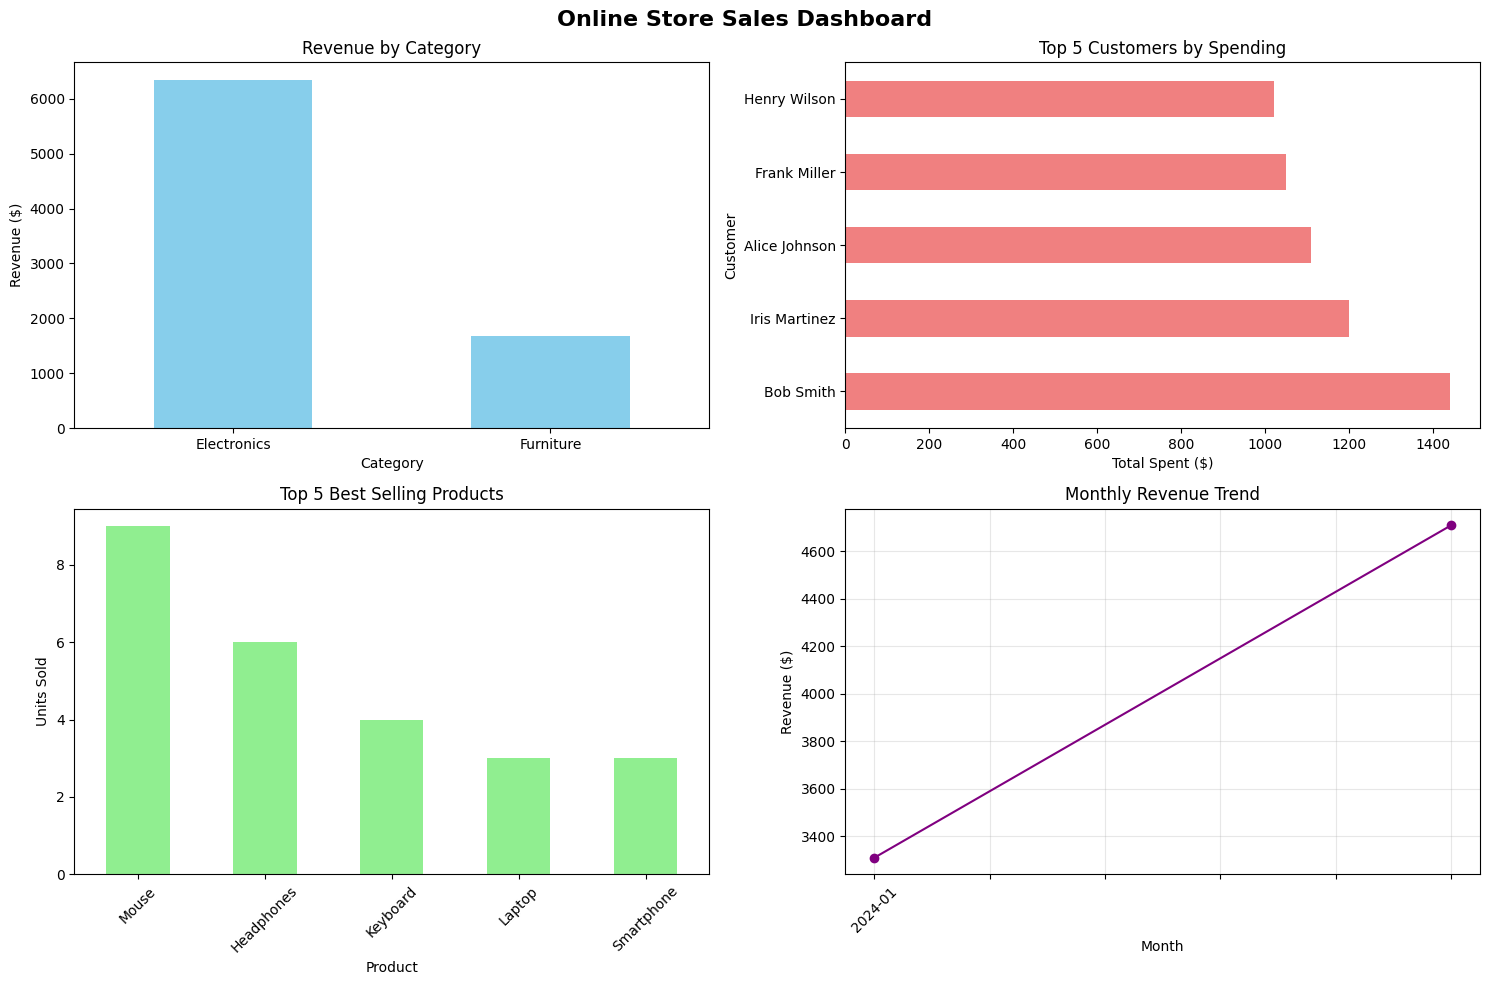


✅ Visual reports generated successfully!


In [23]:
print("=" * 50)
print("GENERATING VISUAL REPORTS")
print("=" * 50)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Online Store Sales Dashboard', fontsize=16, fontweight='bold')

# Chart 1: Sales by Category (Bar Chart)
ax1 = axes[0, 0]
df_category_sales.plot(
    kind='bar',
    x='category',
    y='total_revenue',
    ax=ax1,
    color='skyblue',
    legend=False
)
ax1.set_title('Revenue by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=0)

# Chart 2: Top Customers (Horizontal Bar)
ax2 = axes[0, 1]
df_top_customers.plot(
    kind='barh',
    x='customer_name',
    y='total_spent',
    ax=ax2,
    color='lightcoral',
    legend=False
)
ax2.set_title('Top 5 Customers by Spending')
ax2.set_xlabel('Total Spent ($)')
ax2.set_ylabel('Customer')

# Chart 3: Best Selling Products
ax3 = axes[1, 0]
df_best_products.plot(
    kind='bar',
    x='product_name',
    y='units_sold',
    ax=ax3,
    color='lightgreen',
    legend=False
)
ax3.set_title('Top 5 Best Selling Products')
ax3.set_xlabel('Product')
ax3.set_ylabel('Units Sold')
ax3.tick_params(axis='x', rotation=45)

# Chart 4: Monthly Revenue Trend
ax4 = axes[1, 1]
df_monthly.plot(
    kind='line',
    x='month',
    y='monthly_revenue',
    ax=ax4,
    color='purple',
    marker='o',
    legend=False
)
ax4.set_title('Monthly Revenue Trend')
ax4.set_xlabel('Month')
ax4.set_ylabel('Revenue ($)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visual reports generated successfully!")

In [24]:
def generate_sales_report(start_date=None, end_date=None):
    """
    Generate a comprehensive sales report
    """
    print("=" * 60)
    print("AUTOMATED SALES REPORT GENERATOR")
    print("=" * 60)

    # Build date filter if provided
    date_filter = ""
    if start_date and end_date:
        date_filter = f"WHERE order_date BETWEEN '{start_date}' AND '{end_date}'"
        print(f"\n📅 Report Period: {start_date} to {end_date}")
    else:
        print(f"\n📅 Report Period: All Time")

    # Summary Statistics
    summary_query = f'''
    SELECT
        COUNT(DISTINCT customer_id) as total_customers,
        COUNT(order_id) as total_orders,
        SUM(total_amount) as total_revenue,
        AVG(total_amount) as average_order_value,
        MAX(total_amount) as largest_order
    FROM orders
    {date_filter}
    '''

    df_summary = pd.read_sql_query(summary_query, conn)

    print("\n" + "=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    print(f"Total Customers:        {df_summary['total_customers'].values[0]}")
    print(f"Total Orders:           {df_summary['total_orders'].values[0]}")
    print(f"Total Revenue:          ${df_summary['total_revenue'].values[0]:,.2f}")
    print(f"Average Order Value:    ${df_summary['average_order_value'].values[0]:,.2f}")
    print(f"Largest Order:          ${df_summary['largest_order'].values[0]:,.2f}")

    return df_summary

# Test the function
report_all_time = generate_sales_report()

print("\n" + "=" * 60)
# Generate report for specific period
report_jan = generate_sales_report('2024-01-01', '2024-01-31')

AUTOMATED SALES REPORT GENERATOR

📅 Report Period: All Time

SUMMARY STATISTICS
Total Customers:        10
Total Orders:           20
Total Revenue:          $8,019.63
Average Order Value:    $400.98
Largest Order:          $1,199.98

AUTOMATED SALES REPORT GENERATOR

📅 Report Period: 2024-01-01 to 2024-01-31

SUMMARY STATISTICS
Total Customers:        7
Total Orders:           9
Total Revenue:          $3,309.83
Average Order Value:    $367.76
Largest Order:          $899.99


In [25]:
print("=" * 50)
print("DATA QUALITY CHECKS")
print("=" * 50)

# Check 1: Orders with invalid customer references
print("\n🔍 Check 1: Orphan Orders (orders without valid customers)")
orphan_query = '''
SELECT COUNT(*) as orphan_count
FROM orders o
LEFT JOIN customers c ON o.customer_id = c.customer_id
WHERE c.customer_id IS NULL
'''
orphan_count = pd.read_sql_query(orphan_query, conn)
print(f"   Result: {orphan_count['orphan_count'].values[0]} orphan orders")

# Check 2: Products with zero stock
print("\n🔍 Check 2: Out of Stock Products")
stock_query = '''
SELECT product_name, stock_quantity
FROM products
WHERE stock_quantity = 0
'''
out_of_stock = pd.read_sql_query(stock_query, conn)
print(f"   Result: {len(out_of_stock)} products out of stock")

# Check 3: Customers with no orders
print("\n🔍 Check 3: Inactive Customers (no orders)")
inactive_query = '''
SELECT c.customer_name, c.join_date
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
WHERE o.order_id IS NULL
'''
inactive = pd.read_sql_query(inactive_query, conn)
print(f"   Result: {len(inactive)} inactive customers")
if len(inactive) > 0:
    print(inactive)

# Check 4: Price consistency
print("\n🔍 Check 4: Total Amount Verification")
verify_query = '''
SELECT
    o.order_id,
    o.total_amount as recorded_amount,
    (p.price * o.quantity) as calculated_amount,
    ABS(o.total_amount - (p.price * o.quantity)) as difference
FROM orders o
JOIN products p ON o.product_id = p.product_id
WHERE ABS(o.total_amount - (p.price * o.quantity)) > 0.01
'''
price_issues = pd.read_sql_query(verify_query, conn)
print(f"   Result: {len(price_issues)} orders with price discrepancies")

print("\n✅ Data quality checks complete!")

DATA QUALITY CHECKS

🔍 Check 1: Orphan Orders (orders without valid customers)
   Result: 0 orphan orders

🔍 Check 2: Out of Stock Products
   Result: 0 products out of stock

🔍 Check 3: Inactive Customers (no orders)
   Result: 0 inactive customers

🔍 Check 4: Total Amount Verification
   Result: 0 orders with price discrepancies

✅ Data quality checks complete!


In [26]:
print("=" * 50)
print("EXPORTING REPORTS TO CSV")
print("=" * 50)

# Export all reports
df_category_sales.to_csv('report_sales_by_category.csv', index=False)
print("✅ Exported: report_sales_by_category.csv")

df_top_customers.to_csv('report_top_customers.csv', index=False)
print("✅ Exported: report_top_customers.csv")

df_best_products.to_csv('report_best_selling_products.csv', index=False)
print("✅ Exported: report_best_selling_products.csv")

df_monthly.to_csv('report_monthly_sales.csv', index=False)
print("✅ Exported: report_monthly_sales.csv")

# Download all files
from google.colab import files

files.download('report_sales_by_category.csv')
files.download('report_top_customers.csv')
files.download('report_best_selling_products.csv')
files.download('report_monthly_sales.csv')

print("\n📥 All reports downloaded to your computer!")

EXPORTING REPORTS TO CSV
✅ Exported: report_sales_by_category.csv
✅ Exported: report_top_customers.csv
✅ Exported: report_best_selling_products.csv
✅ Exported: report_monthly_sales.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📥 All reports downloaded to your computer!


In [27]:
print("=" * 50)
print("PROJECT SUMMARY")
print("=" * 50)

# Get table counts
products_count = pd.read_sql_query("SELECT COUNT(*) as count FROM products", conn)
customers_count = pd.read_sql_query("SELECT COUNT(*) as count FROM customers", conn)
orders_count = pd.read_sql_query("SELECT COUNT(*) as count FROM orders", conn)

print(f"\n✅ Database: online_store.db")
print(f"✅ Tables Created: 3")
print(f"   - products: {products_count['count'].values[0]} records")
print(f"   - customers: {customers_count['count'].values[0]} records")
print(f"   - orders: {orders_count['count'].values[0]} records")

print(f"\n✅ SQL Skills Demonstrated:")
print("   - CREATE TABLE")
print("   - INSERT INTO")
print("   - SELECT with WHERE, ORDER BY, LIMIT")
print("   - JOIN (INNER and LEFT)")
print("   - GROUP BY with aggregations")
print("   - Date functions")

print(f"\n✅ Python Skills Demonstrated:")
print("   - Database connections")
print("   - SQL query execution")
print("   - Pandas integration")
print("   - Data visualization")
print("   - Report automation")

print(f"\n✅ Reports Generated: 4")
print(f"✅ Visualizations Created: 4")

# Close the connection
conn.close()
print(f"\n🔒 Database connection closed")

print("\n" + "=" * 50)
print("PROJECT COMPLETE! 🎉")
print("=" * 50)

PROJECT SUMMARY

✅ Database: online_store.db
✅ Tables Created: 3
   - products: 10 records
   - customers: 10 records
   - orders: 20 records

✅ SQL Skills Demonstrated:
   - CREATE TABLE
   - INSERT INTO
   - SELECT with WHERE, ORDER BY, LIMIT
   - JOIN (INNER and LEFT)
   - GROUP BY with aggregations
   - Date functions

✅ Python Skills Demonstrated:
   - Database connections
   - SQL query execution
   - Pandas integration
   - Data visualization
   - Report automation

✅ Reports Generated: 4
✅ Visualizations Created: 4

🔒 Database connection closed

PROJECT COMPLETE! 🎉
